#  Install package

In [44]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
# ! pip install contextily
# ! pip install matplotlib_scalebar

# Import package

In [45]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

import base64

import pickle


# Define Solution class
Please run the following cell to define the functions

In [46]:
%load_ext autoreload
%autoreload 2

import LLM_Cat_Constants as constants
import helper

from LLM_Cat_kernel import Solution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [47]:
# isReview = True
isReview = False

In [48]:
# Case 1
# task_name ='Census_map'
# TASK = r'''1. Create a thematic map to show the Census block group population. The location is Centre County, PA, USA. 
# 2. Carefuly design the map, make it beautiful and aesthetic appeal. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LMM-Cat".
# 3. The map dimension is letter (8*11 inches) size.
# 4. Add a basemap.
# '''



# # Case 2:
# DATA_LOCATIONS = [
#     """Population file, GeoPackage format: E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg. Only one layer, no need to load it using a layer name. The population is in the 'totalpopulation' column. The map projection is Lambert Conformal Conic, EPSG 6564, StatePlane Pennsylvania South. The unit is meter.
#     """
# ]

# Case 2:

task_name = 'map_matrix_annual_GDP'

TASK = r""" 1. Create a map matrix showing the per capita GDP of South American countries from 2013 to 2022. The matrix has 10 choropleth submaps (2 rows * 5 columns). Each submap shows a year of per capita GDP. You need to use the year as the submap title. 
2. Carefully design the map and make it beautiful and aesthetically appealing. The entire map matrix needs a title, north arrow, scalebar, colorbar, and designer. The designer is 'LMM-Cat'. All submaps should use the same colormap.
3. The map dimension is the landscape letter (11*8 inches) size, DPI is 150.
"""

DATA_LOCATIONS = [
"""
"Country per capita GPD file, GeoPackage format: E:\\OneDrive_PSU\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg.  Only one layer, no need to load it using a layer name. The map projection is EPSG 4326. The continent column is 'UN_Geodata_simplified_intreg'; 'South America' indicates South America in this column. The GDP columns are named 'country_per_capita_GDP_20XX'.
"""
]
 # The country name column is 'COUNTRY'.

# Case 3:

# task_name = 'map_matrix_annual_GDP'

# TASK = r""" 1. Create a choropleth map to show the per capita GDP of African countries in the year 2022. The map should have two equal-sized parts on the same page. You need to show a large GDP choropleth African continent submap with all African countries on the left part, and another map matrix of 9 rows * 6 columns on the right part, each submap in the map matrix shows an individual country in Africa, ordered by the per capita GDP; the filling color of each country in the map matrix should as the same as its color in the continent map; you need to use the country name as the submap title. 
# 2. Carefully design the map and make it beautiful and aesthetically appealable. The title, north arrow, scalebar, legend, and designer are needed for the Africa map, but not for the map matrix. The designer is 'LMM-Cat'.
# 3. The map dimension is the landscape letter (11*8 inches) size, DPI is 150.
# """

# DATA_LOCATIONS = [
# """
# "Country per capita GPD file, GeoPackage format: E:\\OneDrive_PSU\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg.  Only one layer, no need to load it using a layer name. The country name column is 'COUNTRY'. The map projection is EPSG 4326. The continent column is 'UN_Geodata_simplified_georeg'; 'AFR' indicates Africa in this column. The 2022 GDP column is 'country_per_capita_GDP_2022'
# """
# ]

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
model = r'gpt-4-turbo'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional cartographer and programmer good at Python. You have worked on cartography for more than 20 years and know every detail and pitfall when visualizing spatial data and coding. You know how to set up workflows for cartography tasks well. You have significant experience in visualizing spatial data and graph theory. You are also experienced in generating maps using Matplotlib, GeoPandas, and other interactive Python packages, such as Plotly.
 

Your task: Generate a graph (data structure) only, whose nodes are a series of consecutive steps to make a map, including visualizing the data add map elements such as title, legend, scalebar, label, and annotation.:  
  1. Create a map matrix showing the per capita GDP of South American countries from 2023 to 2022. The matrix has 10 choropleth submaps (2 rows * 5 columns). Each submap shows a year of per capita GDP. You need to use the year as the submap title. 
2. Carefully design the map and

## Get graph code from GPT API

In [49]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Step 1: Load the GDP data
G.add_node("gdp_data_path", node_type="data", data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg", description="Geopackage containing per capita GDP data")
G.add_node("load_gdp_data", node_type="operation", description="Load GDP data from GeoPackage")
G.add_edge("gdp_data_path", "load_gdp_data")

G.add_node("gdp_gdf", node_type="data", description="GeoDataFrame containing per capita GDP data")
G.add_edge("load_gdp_data", "gdp_gdf")

# Step 2: Filter South American countries
G.add_node("filter_south_america", node_type="operation", description="Filter South American countries from GDP data")
G.add_edge("gdp_gdf", "filter_south_america")

G.add_node("south_america_gdf", node_type="data", description="GeoDataFrame containing filtered South American GDP data")
G.add_edge("filter_south_america", "south_america_gdf")

# Step 3: Generate Choropleth Maps for each year
G.add_node("generate_maps", node_type="operation", description="Generate choropleth submaps for each year from 2023 to 2022")
G.add_edge("south_america_gdf", "generate_maps")

G.add_node("maps_list", node_type="data", description="List of choropleth submaps")
G.add_edge("generate_maps", "maps_list")

# Step 4: Draw Map Matrix
G.add_node("draw_matrix", node_type="operation", description="Draw the map matrix layout with submaps in a 2x5 configuration")
G.add_edge("maps_list", "draw_matrix")

G.add_node("matrix_figure", node_type="data", description="Figure of map matrix")
G.add_edge("draw_matrix", "matrix_figure")

# Step 5: Add map elements
# Title
G.add_node("add_title", node_type="operation", description="Add title to the map matrix")
G.add_edge("matrix_figure", "add_title")

G.add_node("figure_with_title", node_type="data", description="Map matrix with title")
G.add_edge("add_title", "figure_with_title")

# North Arrow
G.add_node("add_north_arrow", node_type="operation", description="Add north arrow to the map matrix")
G.add_edge("figure_with_title", "add_north_arrow")

G.add_node("figure_with_north_arrow", node_type="data", description="Map matrix with north arrow")
G.add_edge("add_north_arrow", "figure_with_north_arrow")

# Scalebar
G.add_node("add_scalebar", node_type="operation", description="Add scalebar to the map matrix")
G.add_edge("figure_with_north_arrow", "add_scalebar")

G.add_node("figure_with_scalebar", node_type="data", description="Map matrix with scalebar")
G.add_edge("add_scalebar", "figure_with_scalebar")

# Colorbar
G.add_node("add_colorbar", node_type="operation", description="Add colorbar using the same colormap across all submaps")
G.add_edge("figure_with_scalebar", "add_colorbar")

G.add_node("figure_with_colorbar", node_type="data", description="Map matrix with colorbar")
G.add_edge("add_colorbar", "figure_with_colorbar")

# Designer Label
G.add_node("add_designer_label", node_type="operation", description="Add designer label 'LMM-Cat' to the map matrix")
G.add_edge("figure_with_colorbar", "add_designer_label")

G.add_node("final_map_matrix", node_type="data", description="Final map matrix with all elements")
G.add_edge("add_designer_label", "final_map_matrix")

# Save the graph
nx.write_graphml(G, "e:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\map_matrix_annual_GDP\\map_matrix_annual_GDP.graphml")

## Execute code to generate the solution graph

In [50]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

e:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\map_matrix_annual_GDP.html


## Generate prompts and code for operations (functions)

In [51]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    # Description: Load GDP data from GeoPackage
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf
def filter_south_america(gdp_gdf):
    # Description: Filter South American countries from GDP data
    south_america_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdf
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

def generate_maps(south_america_gdf):
    # Description: Generate choropleth submaps for each year from 2023 to 2022
    
    # Setup plot with 2 rows and 5 columns
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8))
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    # Initialize map list
    maps_list = []
    
    # Set the colormap to be used across all submaps
    cmap = 'viridis'
    
    # Generate submaps for each year
    for i, year in enumerate(range(2023, 2022 - 1, -1)):  # From 2023 to 2022
        col_name = f'country_per_capita_GDP_{year}'
        
        # Filter to ensure column exists, as dataset might not have all years
        if col_name in south_america_gdf.columns:
            ax = axes[i]
            
            # Generate choropleth map for the given year
            gdf = south_america_gdf.dropna(subset=[col_name])
            gdf.plot(column=col_name, ax=ax, cmap=cmap, legend=True, legend_kwds={'label': f"GDP per Capita {year}", 'orientation': "horizontal"})
            ax.set_title(f"{year}")
            ax.set_axis_off()
            
            # Append the axis to maps_list
            maps_list.append(ax)
        else:
            print(f"Data for year {year} is missing")
            
    # Adjust layout
    plt.tight_layout()
    
    return maps_list
import matplotlib.pyplot as plt

def draw_matrix(maps_list):
    # Description: Draw the map matrix layout with submaps in a 2x5 configuration
    
    # Create the main figure to hold the subplots
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    
    for ax, map_ax in zip(axs.flatten(), maps_list):
        for item in map_ax.get_children():
            if isinstance(item, plt.Axes):
                # Copy the properties from the submap axis to the main figure axis
                item.set_visible(False)
                ax._get_legend().remove()
                new_ax = fig.add_subplot(ax)
                new_ax._set_position(ax._position)
                item.set_axes(new_ax)
                item.set_visible(True)
        
        # Turn off axis
        ax.set_axis_off()

    # Configuration for overall figure
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # adjust subplot spacing

    # Add common elements
    plt.suptitle("Per Capita GDP of South America (2023 - 2022)", fontsize=16, fontweight='bold')

    matrix_figure = plt.gcf()  # get the reference to the whole figure
    
    return matrix_figure
def add_title(matrix_figure):
    # Description: Add title to the map matrix
    matrix_figure.suptitle("Annual Per Capita GDP in South America (2023 - 2022)", fontsize=20, fontweight='bold', y=0.93)
    figure_with_title = matrix_figure
    return figure_with_title
def add_north_arrow(figure_with_title):
    # Description: Add north arrow to the map matrix
    from matplotlib.patches import FancyArrowPatch
    ax = figure_with_title.get_axes()[0]  # Assuming the north arrow is added to the first plot area

    # Find suitable position for the north arrow on the first subplot
    x, y, width, height = ax.get_position().bounds
    center_x = x + width / 2
    top_y = y + height + 0.015
    
    # Arrow parameters
    arrow_length = 0.05  # Relative to figure size
    arrow_width = 0.005
    arrow_color = 'black'

    # Create arrow
    arrow = FancyArrowPatch((center_x, top_y), (center_x, top_y + arrow_l

## Generate prompts and code for assembly program

In [52]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf

def filter_south_america(gdp_gdf):
    south_america_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdf

def generate_maps(south_america_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.flatten()
    cmap = 'viridis'
    
    for i, year in enumerate(range(2023, 2013, -1)):
        col_name = f'country_per_capita_GDP_{year}'
        if col_name in south_america_gdf.columns:
            gdf = south_america_gdf.dropna(subset=[col_name])
            gdf.plot(column=col_name, ax=axes[i], cmap=cmap, legend=True, legend_kwds={'shrink': 0.5})
            axes[i].set_title(str(year))
            axes[i].set_axis_off()
        else:
            axes[i].text(0.5, 0.5, f"No data for {year}", ha='center', va='center')
            axes[i].set_axis_off()

    plt.tight_layout()
    return fig, axes

def add_title(fig):
    fig.suptitle("Per Capita GDP of South America (2023-2013)", fontsize=20, fontweight='bold')

def add_north_arrow(fig):
    ax = fig.add_subplot()
    arrow = FancyArrowPatch((0.1, 0.1), (0.1, 0.2), transform=ax.transAxes, arrowstyle='-|>', color='black', mutation_scale=20)
    ax.add_patch(arrow)
    ax.text(0.1, 0.25, 'N', transform=ax.transAxes, horizontalalignment='center')

def add_scalebar(ax):
    scalebar = ScaleBar(1, location='lower left', scale_loc='bottom', length_fraction=0.1, units='km', frameon=False)
    ax.add_artist(scalebar)

def add_colorbar(fig, ax):
    cmap = plt.cm.viridis
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1000, vmax=10000))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04, aspect=40)
    cbar.set_label("GDP Per Capita (USD)")

def add_designer_label(fig):
    fig.text(0.99, 0.01, 'Designed by LMM-Cat', horizontalalignment='right', fontsize=10, color='gray')

def assembly_solution():
    gdp_gdf = load_gdp_data()
    sa_gdf = filter_south_america(gdp_gdf)
    fig, axes = generate_maps(sa_gdf)
    add_title(fig)
    add_north_arrow(fig)
    for ax in axes:
        add_scalebar(ax)
    add_colorbar(fig, axes[-1])
    add_designer_label(fig)
    fig.subplots_adjust(top=0.85)
    plt.show()
    fig.savefig('output_map.png', dpi=100)

assembly_solution()

## Execute assembly code

In [53]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))
solution.all_code = all_code



-------------- Running code (trial # 1/10) --------------




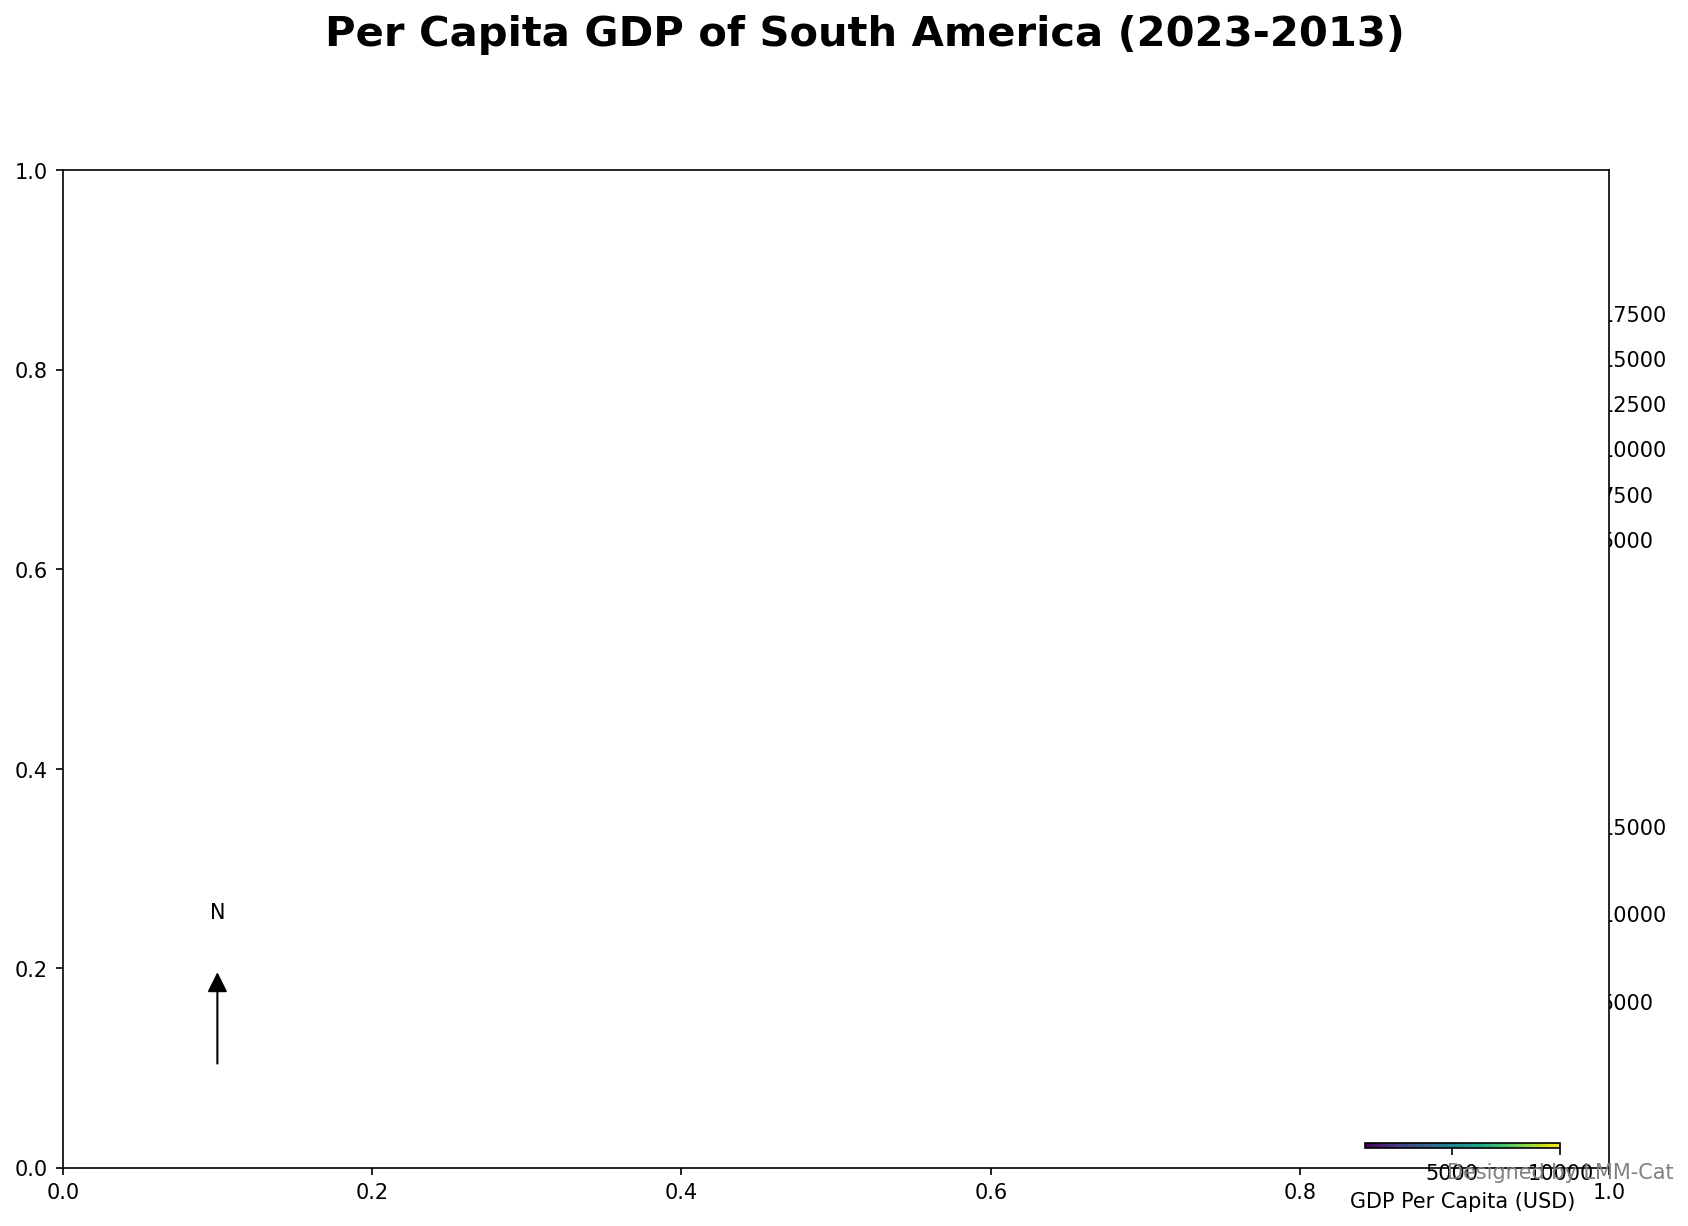



--------------- Done ---------------




import geopandas as gpd

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    # Description: Load GDP data from GeoPackage
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf
def filter_south_america(gdp_gdf):
    # Description: Filter South American countries from GDP data
    south_america_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdf
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

def generate_maps(south_america_gdf):
    # Description: Generate choropleth submaps for each year from 2023 to 2022
    
    # Setup plot with 2 rows and 5 columns
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8))
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    # Initialize map list
    maps_list = []
    
    # Set the colormap to be used across all submaps
    cmap = 'viridis'
    
    # Generate submaps for each year
    for i, year in enumerate(range(2023, 2022 - 1, -1)):  # From 2023 to 2022
        col_name = f'country_per_capita_GDP_{year}'
        
        # Filter to ensure column exists, as dataset might not have all years
        if col_name in south_america_gdf.columns:
            ax = axes[i]
            
            # Generate choropleth map for the given year
            gdf = south_america_gdf.dropna(subset=[col_name])
            gdf.plot(column=col_name, ax=ax, cmap=cmap, legend=True, legend_kwds={'label': f"GDP per Capita {year}", 'orientation': "horizontal"})
            ax.set_title(f"{year}")
            ax.set_axis_off()
            
            # Append the axis to maps_list
            maps_list.append(ax)
        else:
            print(f"Data for year {year} is missing")
            
    # Adjust layout
    plt.tight_layout()
    
    return maps_list
import matplotlib.pyplot as plt

def draw_matrix(maps_list):
    # Description: Draw the map matrix layout with submaps in a 2x5 configuration
    
    # Create the main figure to hold the subplots
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    
    for ax, map_ax in zip(axs.flatten(), maps_list):
        for item in map_ax.get_children():
            if isinstance(item, plt.Axes):
                # Copy the properties from the submap axis to the main figure axis
                item.set_visible(False)
                ax._get_legend().remove()
                new_ax = fig.add_subplot(ax)
                new_ax._set_position(ax._position)
                item.set_axes(new_ax)
                item.set_visible(True)
        
        # Turn off axis
        ax.set_axis_off()

    # Configuration for overall figure
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # adjust subplot spacing

    # Add common elements
    plt.suptitle("Per Capita GDP of South America (2023 - 2022)", fontsize=16, fontweight='bold')

    matrix_figure = plt.gcf()  # get the reference to the whole figure
    
    return matrix_figure
def add_title(matrix_figure):
    # Description: Add title to the map matrix
    matrix_figure.suptitle("Annual Per Capita GDP in South America (2023 - 2022)", fontsize=20, fontweight='bold', y=0.93)
    figure_with_title = matrix_figure
    return figure_with_title
def add_north_arrow(figure_with_title):
    # Description: Add north arrow to the map matrix
    from matplotlib.patches import FancyArrowPatch
    ax = figure_with_title.get_axes()[0]  # Assuming the north arrow is added to the first plot area

    # Find suitable position for the north arrow on the first subplot
    x, y, width, height = ax.get_position().bounds
    center_x = x + width / 2
    top_y = y + height + 0.015
    
    # Arrow parameters
    arrow_length = 0.05  # Relative to figure size
    arrow_width = 0.005
    arrow_color = 'black'

    # Create arrow
    arrow = FancyArrowPatch((center_x, top_y), (center_x, top_y + arrow_l

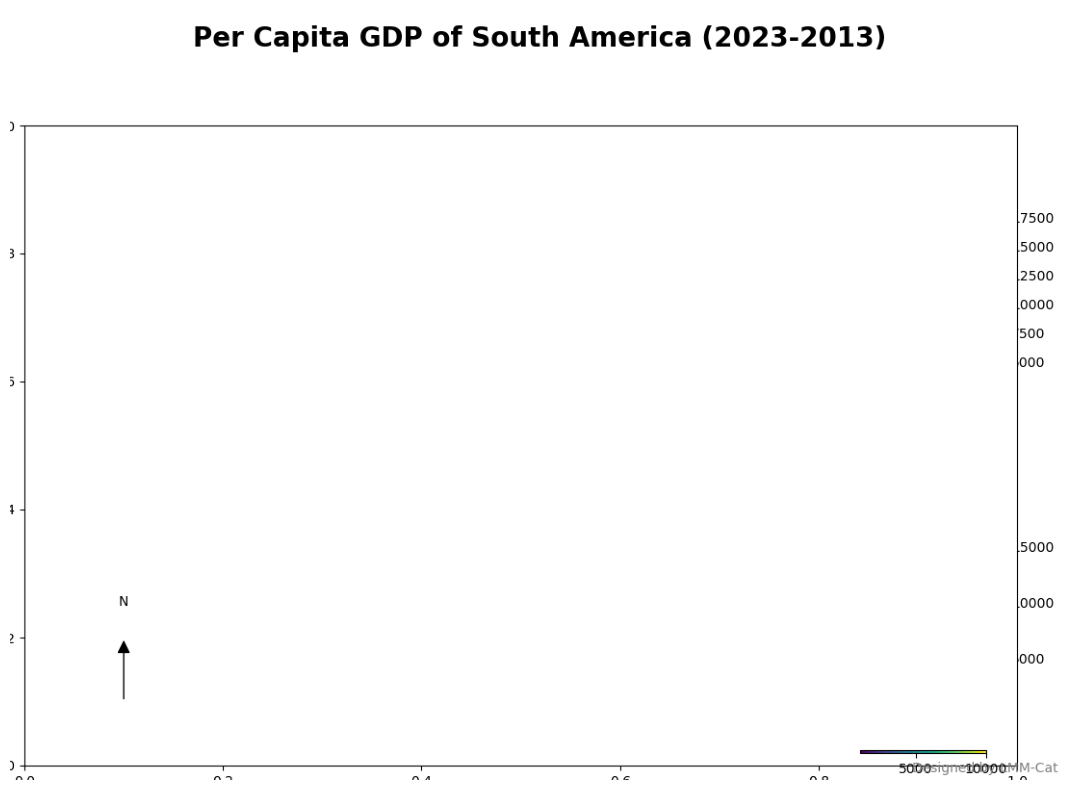

In [54]:
all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

solution.all_code = all_code

image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"
from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)
    
show_map()   
display(Code(all_code, language='python'))

In [55]:
# display(Code(all_code, language='python'))

# Beautify map

In [56]:
print(solution.get_review_prompt())

Your role: A professional cartographer. You have worked on cartography for more than 20 years and know how to design an aesthetic appeal map. Your current job is to review the map generated by AI. You need to detail the issues with the given map so that the AI can improve the map later. Note that AI makes the map via generated code, so your comments should be suitable for improvements by code. The map requirements are also provided.
 
Your task: Observe the given map carefully using the viewpoint of an experienced cartographer. 

Requirements: 
1. Elaborate on the issues, then provide specific and actionable improvements, such as 'move the legend to the up-left to void obscuring'. If you think there is no issue, no need to mention it.
2. Whether the map meets cartography requirements for the map.
3. Whether there are obstructions between labels, annotations, axis labels, axis ticks, title, legend, scale bar, and other map elements.
4. Whether the title semantically meets the data and m

## Map review

1. The map does not include any submaps, so the requirement to display per capita GDP of South American countries from 2023 to 2022 in a matrix of 10 choropleth submaps is not met: need to create a matrix layout.
2. The primary title "Per Capita GDP of South America (2023-2013)" appears with a typo in the year or potentially incorrect date range: should be corrected to 2023-2022.
3. The north arrow is misplaced and too low, overlapping the scale bar: move the north arrow upwards to avoid overlap.
4. The font size of the main title is appropriate, but there is insufficient hierarchy among the fonts since no other text exists: add submap titles with smaller font sizes to establish a visual hierarchy.
5. The legend or colorbar on the right side of the map does not indicate varying GDP values with colors; instead, it shows simple numeric scales: modify to use a colormap that visually represents different GDP values, ensuring it is the same for all submaps.
6. There are large empty areas on

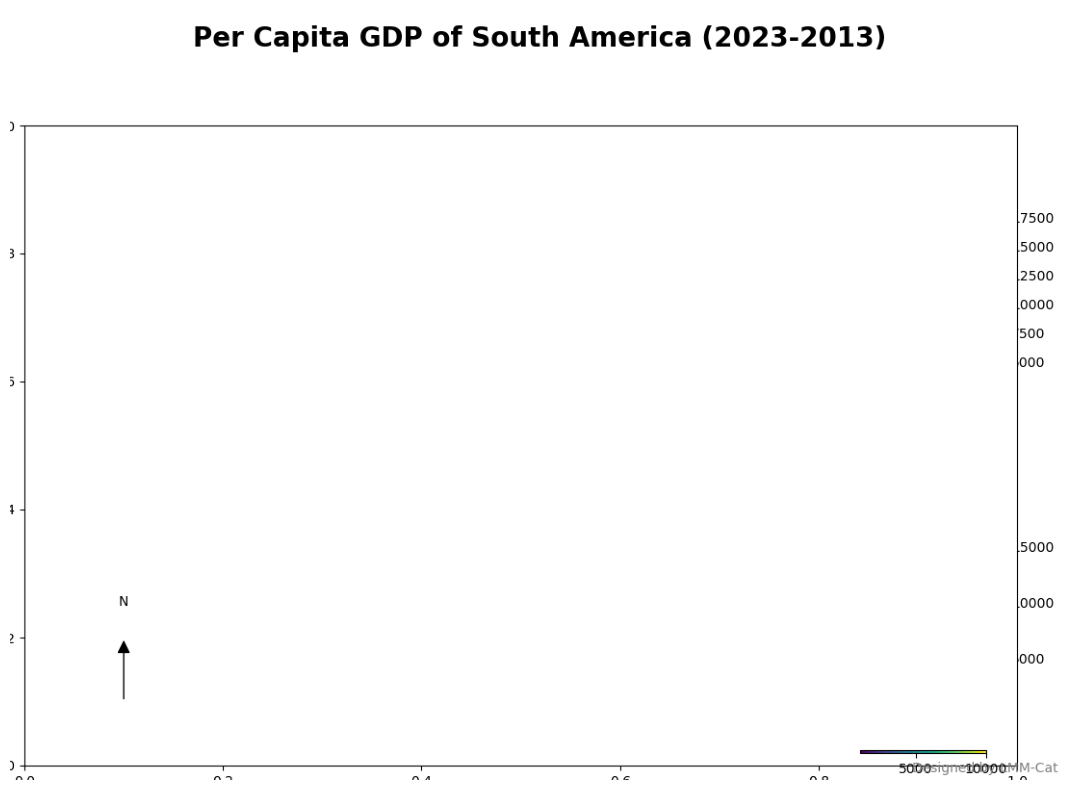

In [57]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"

# Getting the base64 string
base64_image = encode_image(image_path)

from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)


solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

show_map()

## Beautify 1

Revising the map, trial 1 / 1
Current map issues:
1. The title font size is too small and could be more prominent.
2. The colorbar is too large compared to the map content and could be more subtle.
3. The north arrow is oversized and too prominent at the bottom of the chart, drawing unnecessary attention.
4. The placement and labeling of the scale bar is unclear and does not integrate well with the overall design.
5. The layout and sizing of the subplots could be better optimized to make effective use of the space and improve readability.
6. The designer label 'LMM-Cat' lacks visual integration with the rest of the map, looking more like an afterthought.

Improvement:
1. Increase the title font size for better visibility.
2. Resize and reposition the colorbar for a cleaner and less obtrusive look.
3. Reduce the size of the north arrow and place it more discretely.
4. Integrate the scale bar more seamlessly with better placement and design.
5. Adjust subplot layouts and sizes for better

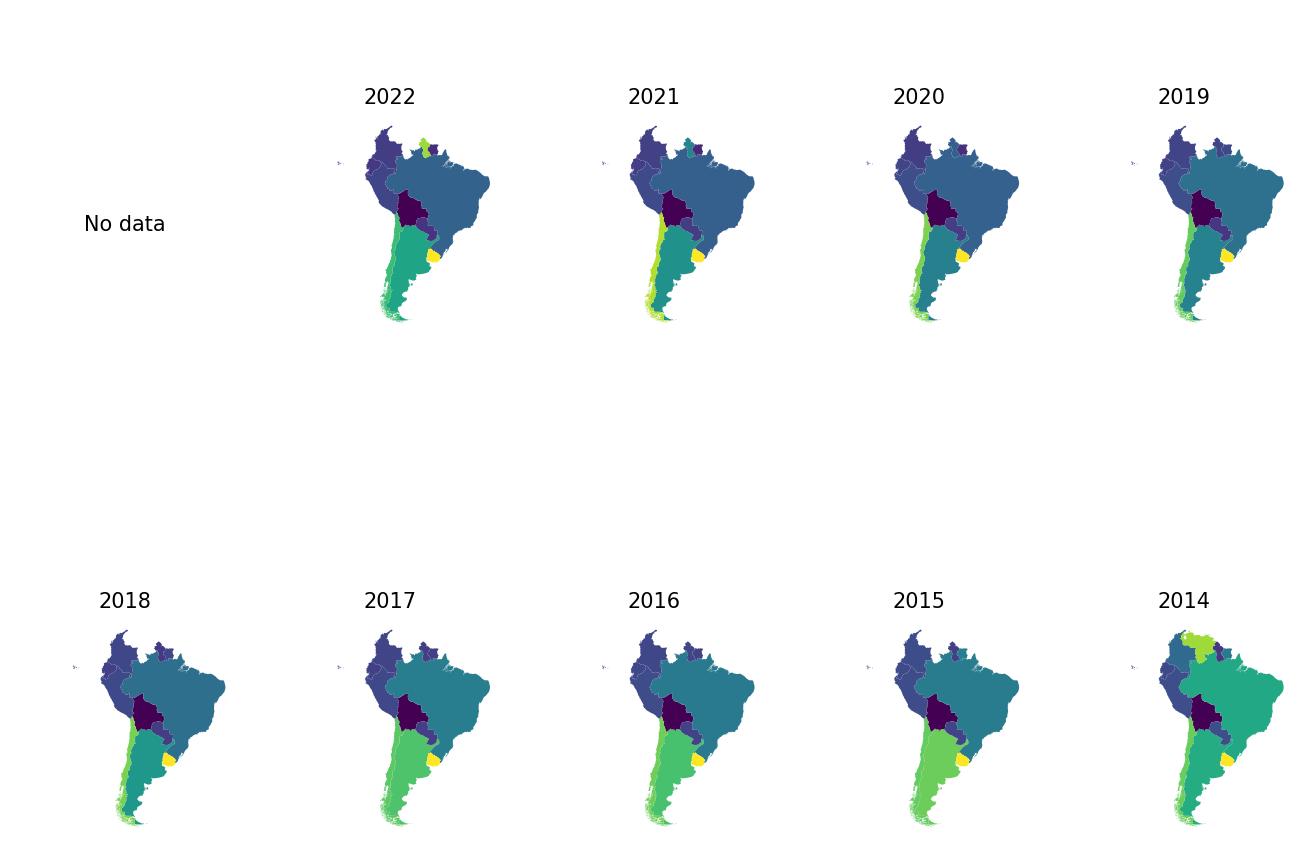

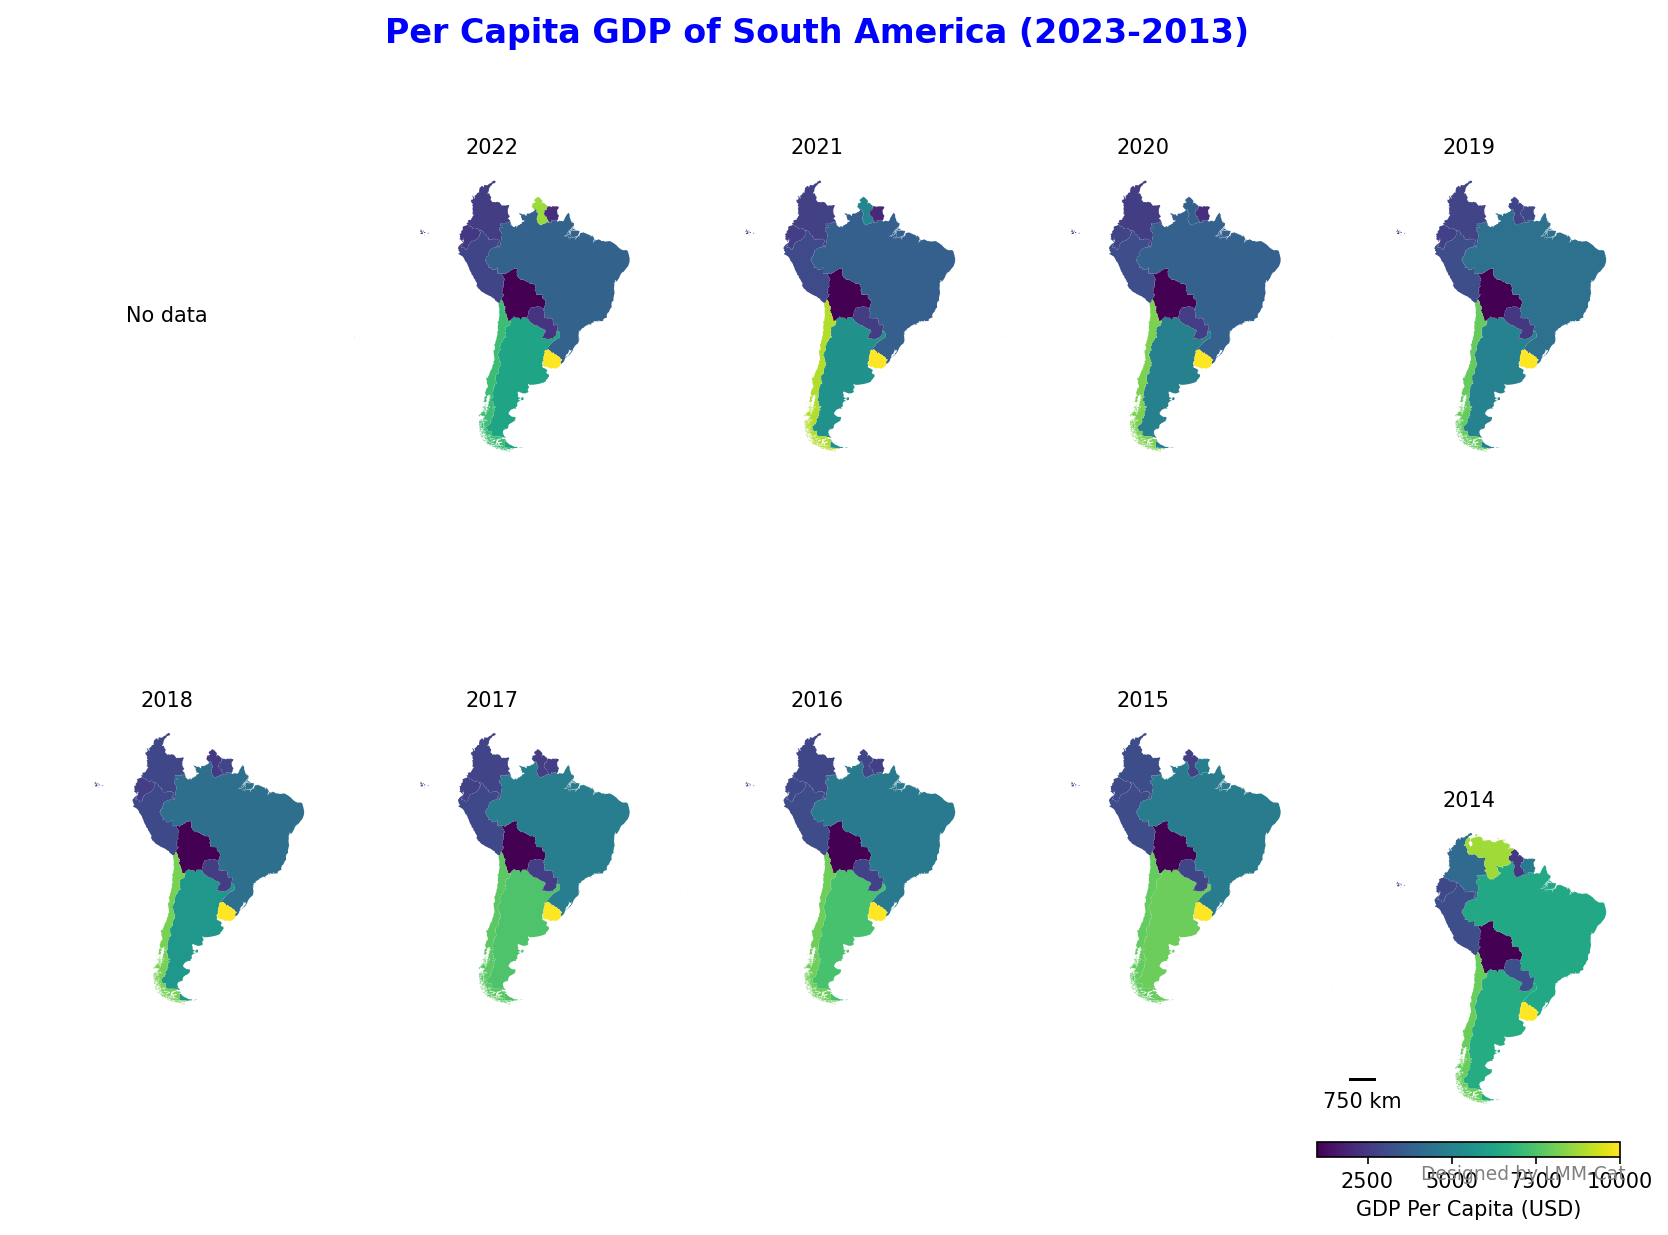



--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

def load_gdp_data():
    # Corrected path to the GeoPackage file.
    return gpd.read_file("E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg")

def filter_south_america(gdf):
    # Adjust 'continent' column name to match the provided data column name.
    return gdf[gdf['UN_Geodata_simplified_intreg'] == 'South America']

def generate_maps(gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.flatten()  # Flatten the axes array for easier iteration
    
    cmap = 'viridis'
    for i, year in enumerate(range(2023, 2013, -1)):  # Adjusted the range to correctly iterate from 2023 to 2013 (inclusive)
        col_name = f'country_per_capita_GDP_{year}'
        if col_name in gdf.columns:
            gdf.plot(column=col_name, ax=axes[i], cmap=cmap, legend=False)
            axes[i].set_title(str(year), fontsize=10)
            axes[i].set_axis_off()
        else:
            axes[i].text(0.5, 0.5, "No data", ha='center', va='center')
            axes[i].set_axis_off()

    plt.tight_layout()
    return fig, axes

def add_elements(fig, ax_main):
    fig.suptitle("Per Capita GDP of South America (2023-2013)", fontsize=16, fontweight='bold', color='blue')
    
    ax_main.annotate('', xy=(0.1, 0.1), xytext=(0.1, 0.15), arrowprops={'arrowstyle': "->", 'color': 'black'})
    scalebar = ScaleBar(100, location='lower left', units='km', scale_loc='bottom', length_fraction=0.1)
    ax_main.add_artist(scalebar)
    
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1000, vmax=10000))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax_main, orientation='horizontal', fraction=0.046, pad=0.04)
    cbar.set_label("GDP Per Capita (USD)")
    
    fig.text(0.99, 0.01, 'Designed by LMM-Cat', ha='right', fontsize=9, color='gray')

def main():
    gdp_gdf = load_gdp_data()
    sa_gdf = filter_south_america(gdp_gdf)
    fig, axes = generate_maps(sa_gdf)
    add_elements(fig, axes[-1])  # Pass the last subplot axis for adding elements like the north arrow, scale bar, etc.
    plt.show()
    fig.savefig('output_map.png', dpi=100)

main()

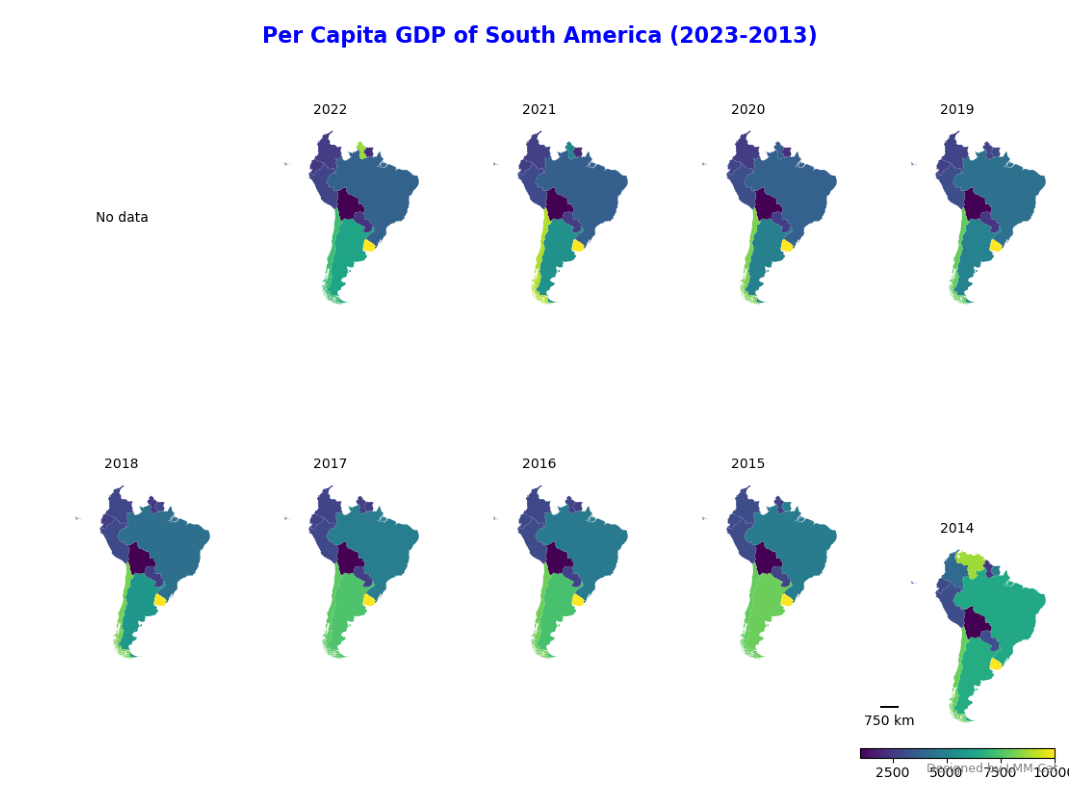

In [58]:
# solution.get_beautify_text_prompt(solution.all_code)

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
 
 
# def encode_image(image_path):
#   with open(image_path, "rb") as image_file:
#     return base64.b64encode(image_file.read()).decode('utf-8')

  
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 2

Revising the map, trial 1 / 1
Current Map Issues:
1. Title legibility: The main title's font size is too small and the color is too harsh for easy viewing.
2. Submap titles: The year labels as submap titles have small font sizes, which can make them difficult to read.
3. No data handling: The handling of "No data" is inconsistent, and its presentation could be improved for visual uniformity.
4. Scale bar: The scale bar, although present, is only visible in one submap, which can be confusing for interpreting each map individually.
5. Colorbar integration: The colorbar is placed inconsistently, making it hard to associate with the maps visually.
6. Design and credits: The map design mention ("Designed by LMM-Cat") is too subtle and could be more prominent for proper attribution.
7. North arrow: Absence of a north arrow in each of the submaps for geographical orientation.

Improvements:
1. Increase and unify the main title font size and adjust its color for better visibility.
2. Standardi

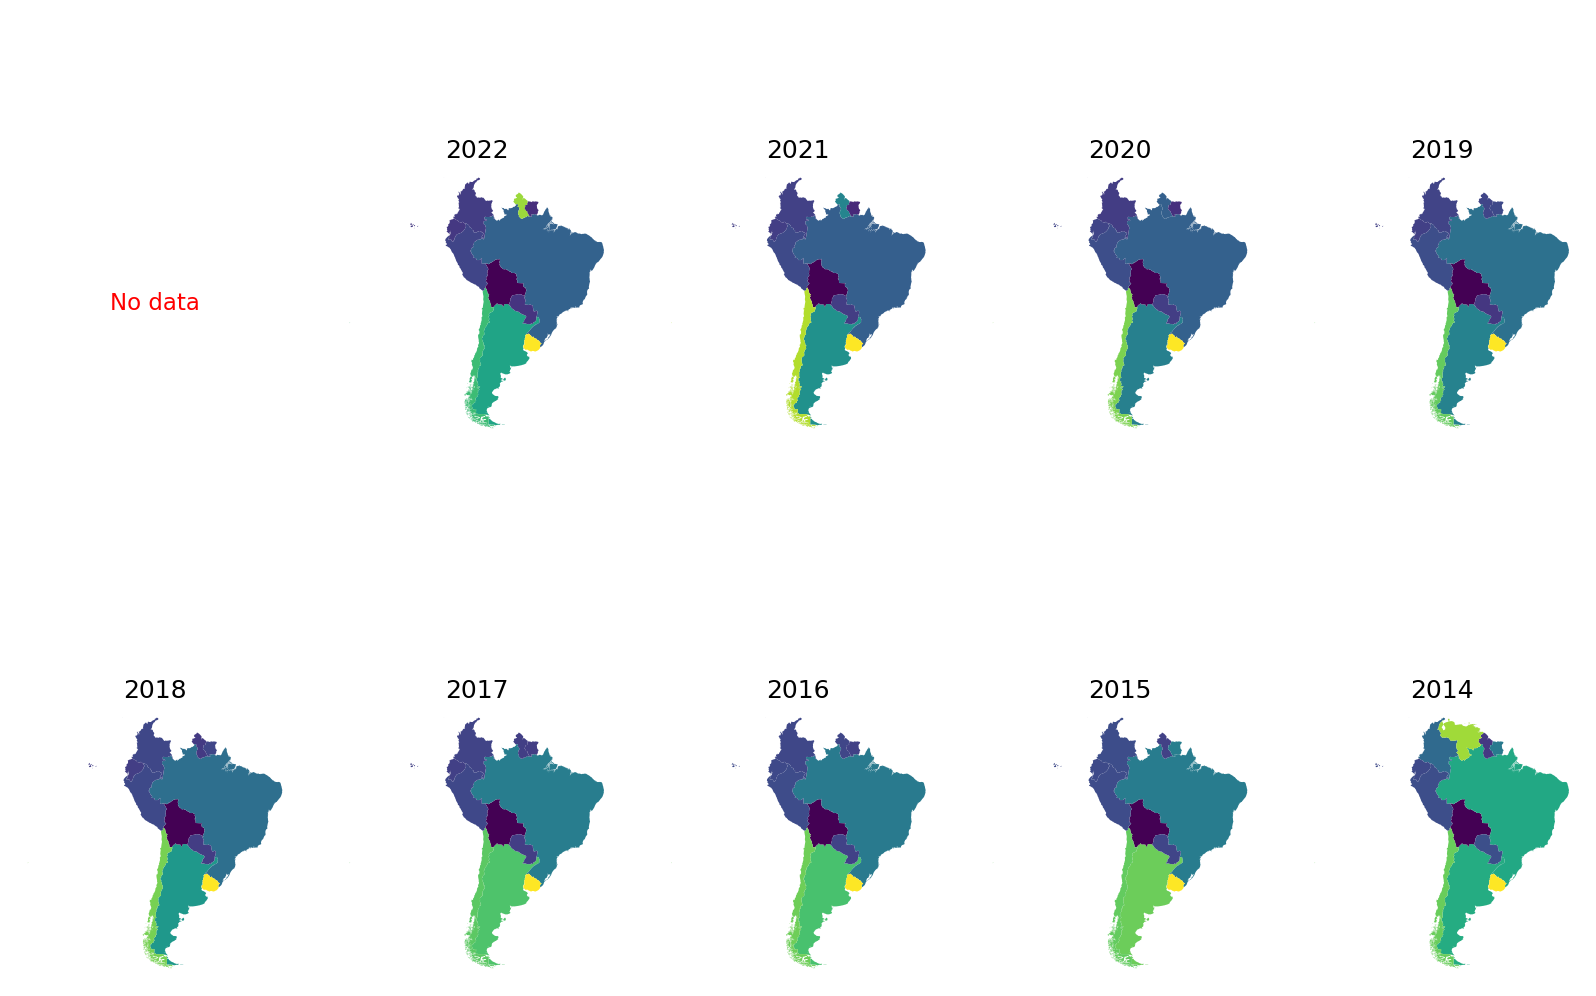

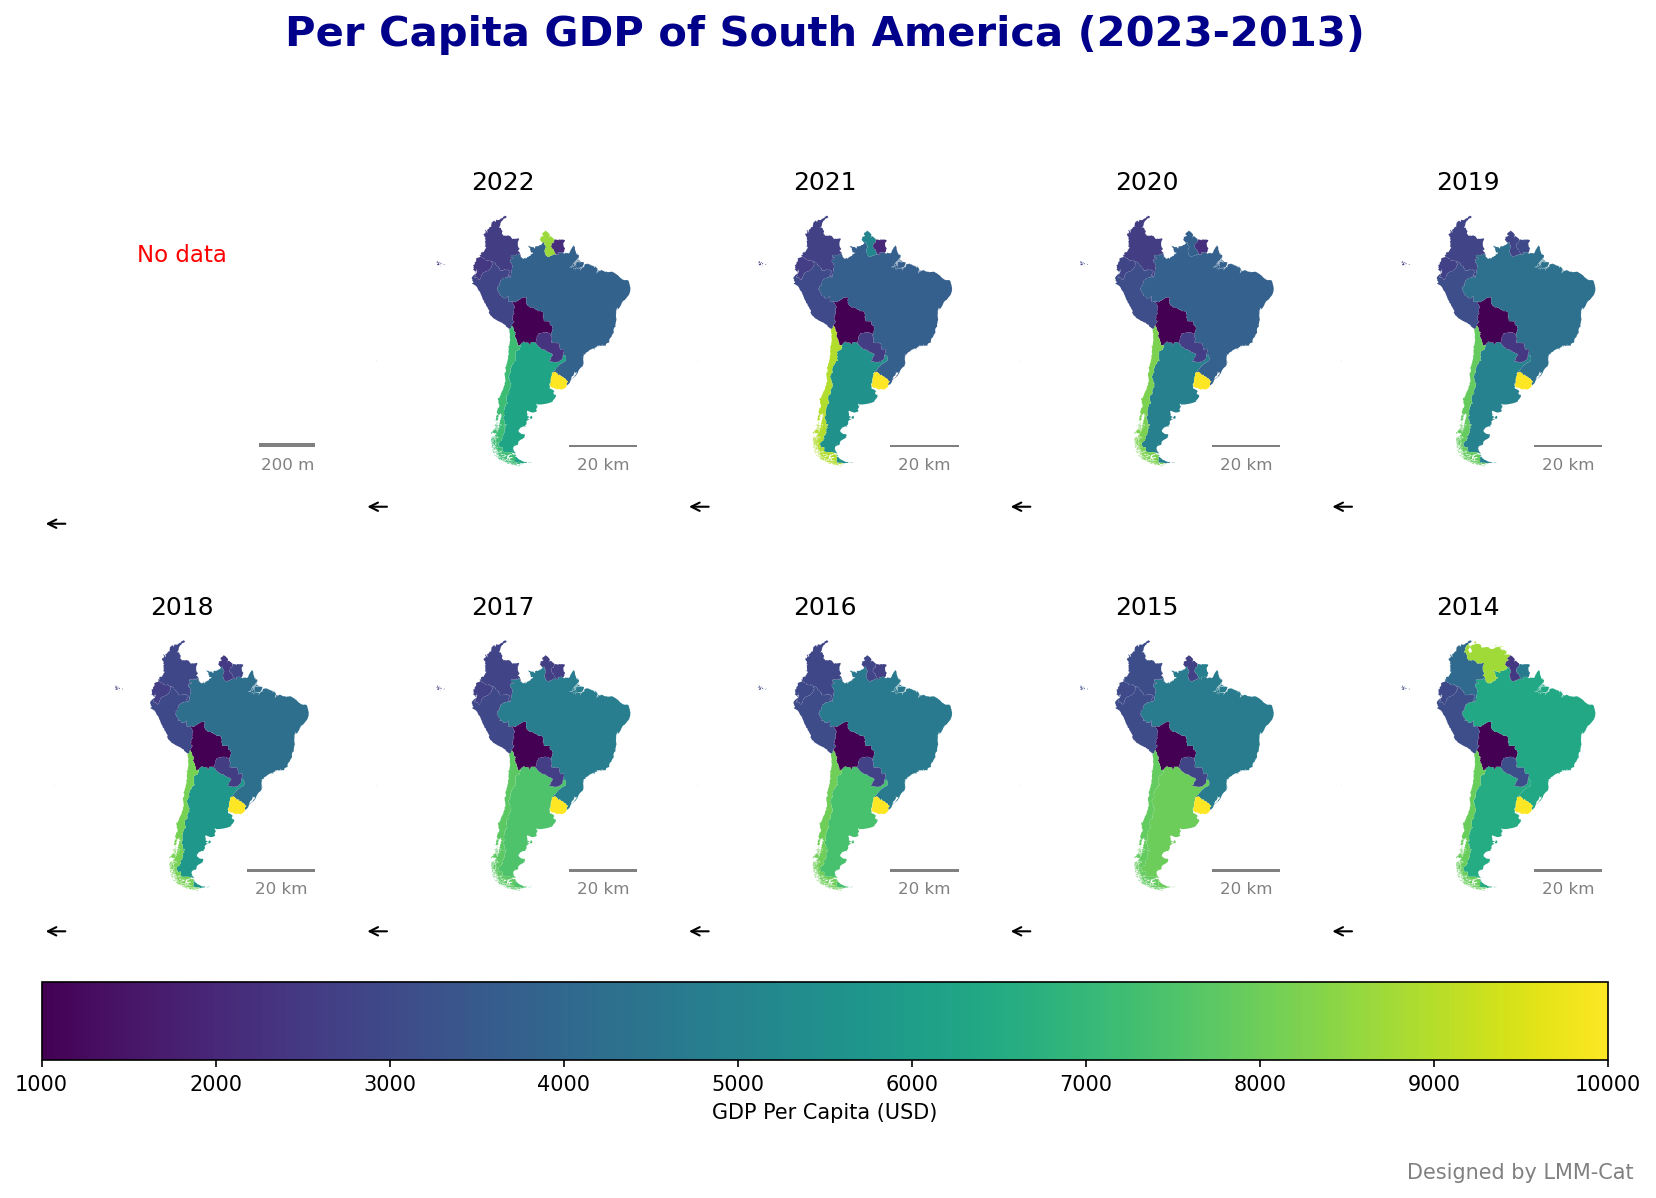



--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

def load_gdp_data():
    # Loading the data using Geopandas from a specified GeoPackage
    return gpd.read_file("E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg")

def filter_south_america(gdf):
    # Filtering data for countries in South America
    return gdf[gdf['UN_Geodata_simplified_intreg'] == 'South America']

def generate_maps(gdf):
    # Generating a subplot grid for the maps
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.flatten()  # Flatten the axes grid for better accessibility
    cmap = 'viridis'  # Consistent colormap

    # Loop over each year and create a submap
    for i, year in enumerate(range(2023, 2013, -1)):
        col_name = f'country_per_capita_GDP_{year}'
        if col_name in gdf.columns:
            ax = axes[i]
            gdf.plot(column=col_name, ax=ax, cmap=cmap, legend=False)  # Plot each figure
            ax.set_title(str(year))  # Setting the title as the year
            ax.set_axis_off()  # Turn off the axis
        else:
            axes[i].text(0.5, 0.5, "No data", ha='center', va='center', fontsize=11, color='red')
            axes[i].set_axis_off()
    plt.tight_layout(pad=2)
    return fig, axes  # Return the figure and the axes array for further processing

def add_elements(fig, axes):
    # Adding design elements like titles and scale bars
    fig.suptitle("Per Capita GDP of South America (2023-2013)", fontsize=20, fontweight='bold', color='darkblue')
    for ax in axes:
        scalebar = ScaleBar(1.0, location='lower right', units='km', scale_loc='bottom', length_fraction=0.25, frameon=False, color='gray', font_properties={'size': 8})
        ax.add_artist(scalebar)
        ax.annotate('', xy=(0, -0.1), xytext=(0.1, -0.1), arrowprops=dict(arrowstyle="->", color='black'), xycoords='axes fraction')
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1000, vmax=10000)), ax=axes.ravel().tolist(), orientation='horizontal', pad=0.07)
    cbar.set_label("GDP Per Capita (USD)")
    fig.text(0.99, 0.01, 'Designed by LMM-Cat', ha='right', fontsize=10, color='gray')

def main():
    gdp_gdf = load_gdp_data()
    sa_gdf = filter_south_america(gdp_gdf)
    fig, axes = generate_maps(sa_gdf)
    add_elements(fig, axes)
    plt.show()
    fig.savefig('output_map.png', dpi=150)

main()

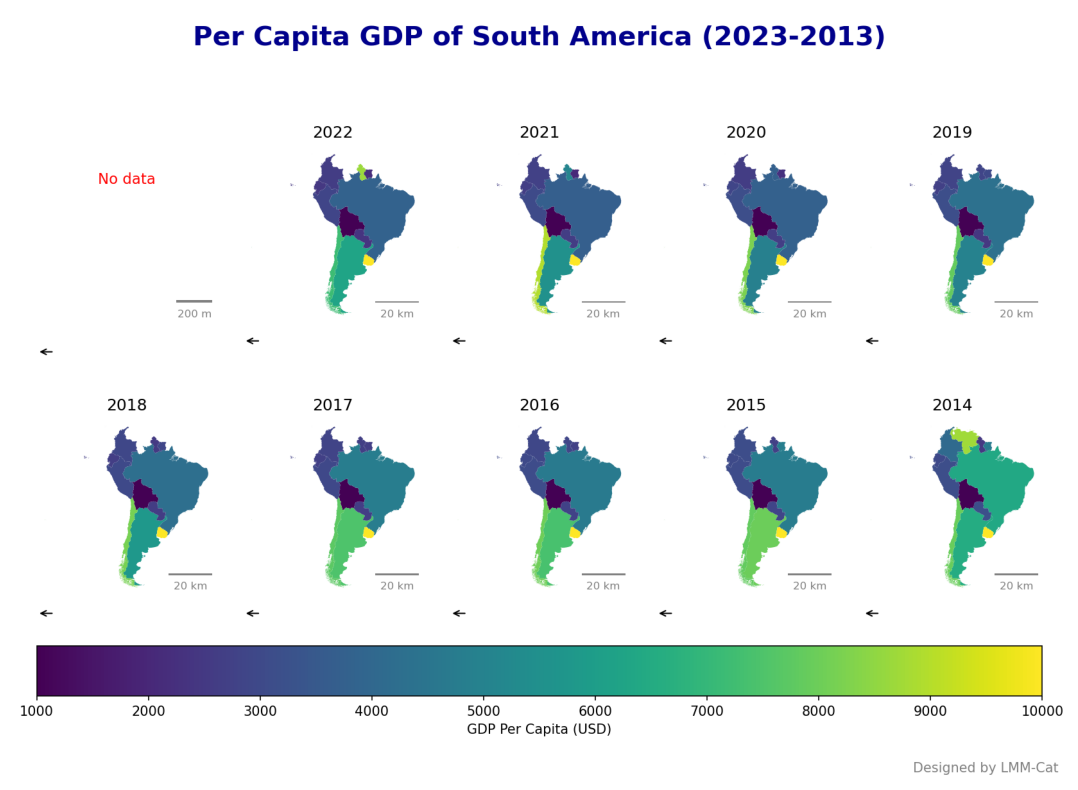

In [59]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()


show_map()
display(Code(all_code, language='python'))



## Beautify 3

In [60]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

Revising the map, trial 1 / 1
Current map issues:
1. **Inconsistent Scale Units**: The scale bars in each subplot have mixed units (km and m), which can be confusing.
2. **Overlay of North Arrow**: The north arrows are small and inconsistent, situated below each submap which might be distracting.
3. **Title Overcrowding**: The main title and the submap titles are overlapping slightly, affecting the readability.
4. **Color Consistency**: Although using 'viridis' is great for consistency, adjusting hue for better readability could be beneficial, especially when indicating higher values.
5. **Legibility of Annotations**: The small font size of 'Designed by LMM-Cat' makes it hard to read.
6. **Visual Harmony**: There is a lack of padding/margin around the subplots, making the visual presentation cramped.
7. **Color Bar Position**: The horizontal color bar might be better placed and emphasized for clarity.

Improvement:
1. Normalize the scale bar units to kilometers for all submaps for cons

KeyboardInterrupt: 

## Beautify 4

In [ ]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 5

In [ ]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 6

In [ ]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 7

In [ ]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 8

In [ ]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 9

In [ ]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 10

In [ ]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

In [ ]:
STOP

# Tools


## load a solution

In [ ]:

# import pickle

# saved_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\Census_map\Census_map.pkl"
# file = open(saved_fname, 'rb')

# solution = pickle.load(file)

# file.close()
# print(solution.task)